### Занятие 1. Работа с API

#### 🛠️ С чего начинается работа с данными

1. **Поиск и погружение.** Найти источник данных и глубоко погрузиться в предметную область. Важно понять: как, кем и откуда заполняются данные, каков их смысл и объём.

2. **Оценка и очистка.** Оценить аномалии в датасете и, при необходимости, провести его очистку. Это основа для любого дальнейшего анализа.

#### 📊 Источники ошибок в данных

- **Ввод данных:** Человеческий фактор, опечатки, невнимательность при ручном заполнении.
- **Генерация данных:** Сбои в работе сенсоров, алгоритмов или скриптов, создающих данные.
- **Перенос данных:** Ошибки при интеграции, миграции или выгрузке данных из одной системы в другую.
- **Обработка данных:** Некорректные преобразования, агрегации или применение бизнес-логики.

#### 🔍 Частые проблемы, решаемые на этапе очистки

- Дубликаты: Полностью или частично повторяющиеся записи.
- Пропущенные значения: Отсутствующие данные (NaN, NULL, пустые строки).
- Некорректные типы данных: Числа, сохранённые как текст, даты в нераспознаваемом формате.
- Неактуальные записи: Удалённые или устаревшие данные, которые всё ещё присутствуют в наборе.
- Разный формат данных: Неединый стандарт представления (даты, номера телефонов, регистр текста).

#### 📚 Материалы для самообучения
- [Практическое руководство по предобработке данных](https://habr.com/ru/post/718708/) — Habr
- [Очистка данных с помощью Python: полное руководство](https://techrocks.ru/2020/04/02/data-cleaning-with-python/) — TechRocks
- [Сборник полезных методов для очистки данных в Pandas](https://habr.com/ru/post/349860/) — Habr

In [ ]:
!pip install pandas requests xlsxwriter

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import json
import pandas as pd
import xlsxwriter

### Часть 1. Введение в очистку данных
- Для менеджеров по продажам выгрузить в excel телефоны, которые клиенты оставляли при регистрации в январе на онлайн-конференцию. 
- Данные лежат в file1.csv

In [ ]:
# Загрузка данных 
data = pd.read_csv('file1.csv', index_col=0, sep=';')

Шаг 1. Знакомство с данными.

- df.head() - посмотреть первые несколько строк
- df.sample() - посмотреть случайные строки
- df.info() - получить общую информацию о данных
- df.describe() - получить статистическое описание числовых данных
- df.dtypes - посмотреть типы данных всех столбцов

In [ ]:
# Вывести топ 10 строк датасета

In [ ]:
# Вывести случайный сэмпл из 20 строк данных

In [ ]:
# Вывести сводную информация о датасете

Шаг 2. Основные функции для конвертации типов данных:

1. astype()
- Пример: df['column'] = df['column'].astype('int64')
- Пример: df['price'] = df['price'].astype('float')

2. pd.to_numeric()
- Пример: df['age'] = pd.to_numeric(df['age'], errors='coerce')
- Пример: df['score'] = pd.to_numeric(df['score'], downcast='integer')

3. [pd.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- Пример: df['date'] = pd.to_datetime(df['date_column'])
- Пример: df['timestamp'] = pd.to_datetime(df['time_string'], format='%Y-%m-%d %H:%M:%S')

4. pd.to_timedelta()
- Пример: df['duration'] = pd.to_timedelta(df['minutes'], unit='m')
- Пример: df['time_diff'] = pd.to_timedelta(df['hours'], unit='h')

In [ ]:
# Сконвертировать RegistrationDate в датавремя

In [ ]:
# Переименовать UserId -> userid, Phone -> phone, RegistrationDate -> registration
# --> df.rename(columns = {' old_col1 ':' new_col1', 'old_col2 ':' new_col2 '}, inplace = True )

Шаг 3. Фильтруем регистрации за январь и запишем в df_jan

- в реальной задаче фильтровать период записей лучше на 1 шаге импорта из БД или при подключении к API для сокращения объёма данных в df
- фильтруем, т.к. убедились в отсутствии пустых значений для дат регистрации в ConfPhones.info()
- нет смысла очищать весь датасет, когда нужен конкретный период

Основные способы фильтрации df:

1. df[df['column'] > 10] 
- Пример: df[df['age'] > 18]
- Пример с несколькими условиями: df[(df['age'] > 18) & (df['city'] == 'Москва')]

2. df.query('column > 10')
- Пример: df.query('age > 18')
- Пример с несколькими условиями: df.query('age > 18 and city == "Москва"')

3. df.isin([value1, value2])
- Пример: df[df['city'].isin(['Москва', 'Санкт-Петербург'])]
- Пример: df[df['status'].isin([1, 3, 5])]

In [ ]:
# Равноцельные примеры фильтрации: 
data[(data.registration >= '2023-01-01') & (data.registration <= '2023-01-31')].head(5)
data.query('registration >= "2023-01-01" and registration <= "2023-01-31"').head(5) # <-- внимательно к разным типам скобочек

In [ ]:
# Регистрации в январе сохранить в df_jan

Шаг 4. Работа с пропусками

Если в данных обнаружены пропуски (NAN, None), важно оценить их количество, и, если пропусков много попытаться понять природу их возникновения.

Что можно делать с пропусками:
- восстановить данные из первоисточника
- восстановить данные самостоятельно  
- заполнить дефолтным значением
- удалить записи с пропусками
- исключить колонку с пропусками из задачи

Пропуски могут маскироваться под пустые строки!

Функции для поиска пустых значений:
- df.isna() - поиск пропущенных значений (isnull = isna)
- df.notna() - поиск непустых значений
- df.isnull() - синоним для isna()
- df['column'].isna().sum() - подсчет пропусков в столбце
- df.fillna(value) - заполнение пропусков значением
- df.dropna() - удаление строк с пропусками

In [ ]:
# Вывести статистику пропусков в df_jan

In [ ]:
# Вывести строки, если есть хотя бы один пропуск в любом поле (используй any(axis = 1))

- Удалим строки с пустыми телефонами, т.к. выгрузка нужна для обзвона, без телефона запись бесполезна.
- Один из вариантов не удалять строки, а записывать в отдельный df для аномалий и передавать вместе с основной выгрузкой заказчику.

In [ ]:
# Запишем строки с пустым phone в df_anomaly

# Запишем строки с непустым phone в  df_clean

Шаг 5. Проверяем дубли (повторяющиеся строки и подстроки в данных)

Полезные функции:
- df.duplicated()
- df.drop_duplicates() 
- df.fillna('value')

In [ ]:
# Вывести количество полных дублей по всем колонкам в df_clean

- data.duplicated() -> выводит ПЕРВОЕ вхождение дубля. 
- data.duplicated(keep=False) -> выводит ВСЕ вхождения дубля

In [ ]:
# Вывести записи - полные дубли по всем колонкам

In [ ]:
# Сохранить дубли в df_anomaly (используй pd.concat([df1, df2])) 

In [ ]:
# Удалить дубли из df_clean

In [ ]:
# Вывести количество дублей по телефонам (на прозвон не стоит отдавать один и тот же телефон несколько раз)
# используй duplicated(subset = ...)

In [ ]:
# Видим, что телефоны - фейк

In [ ]:
# Запишем их в аномалии и удалим из df_clean

In [ ]:
# Аналогичным способом посмотреть дубли по userid

Шаг 6. Записываем выгрузку в excel файл

In [ ]:
# Запись с помощью ExcelWriter
with pd.ExcelWriter('несколько_листов.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Первый', index=False)
    df2.to_excel(writer, sheet_name='Второй', index=False)

# Запись с помощью pandas
df.to_excel('файл.xlsx', sheet_name='Данные', index=False)

In [ ]:
# Ваше решение


Поздравляю, вы завершили работу над задачей !

### Часть 2. Работа с API

Что такое API и как оно работает?

**API (Application Programming Interface)** — это программный интерфейс приложений, набор инструкций, который позволяет разным приложениям общаться между собой. Ключевая идея проста: API позволяет разработчикам, аналитикам и всем интересующимся использовать готовые возможности других сервисов для получения необходимых данных

**Принцип работы API прост**:
1. Сторонний разработчик пишет какое-то своё приложение, функцию, операционную систему.
2. Он составляет API — набор правил, на основе которых другие разработчики могут использовать его разработку тем или иным способом.
3. Вы получаете этот API — он либо лежит в публичном доступе, либо открывается по запросу для клиентов.
4. Вы вызываете API внутри своего приложения и пользуетесь нужными вам функциями.

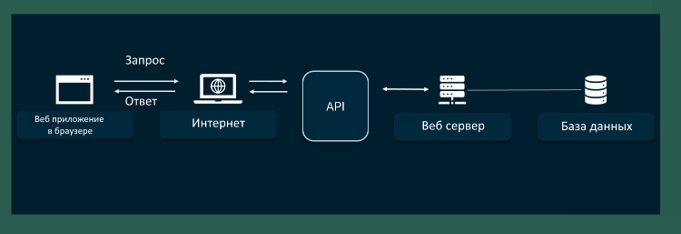

**Формат передачи данных через API**:
- XML — расширяемый язык разметки. Редко используется в публичных API.
- JSON — текстовый формат обмена данными, основанный на JavaScript.  

**Что это за JSON такой?**

В качестве значений в JSON могут быть использованы: JSON-объекты, массивы, числа, литералы (true, false, null), строки и многое другое. 

Json-объект — это неупорядоченное множество пар «ключ:значение», заключённое в фигурные скобки «{ }».

- Ключ — это название параметра, который возращает нам сервер, или который мы передаем ему
- Значение — данные, которые мы передаем или которые нам возращает сервер 
- Ключ описывается строкой, между ним и значением стоит символ «:». 
- Пары ключ-значение отделяются друг от друга запятыми.

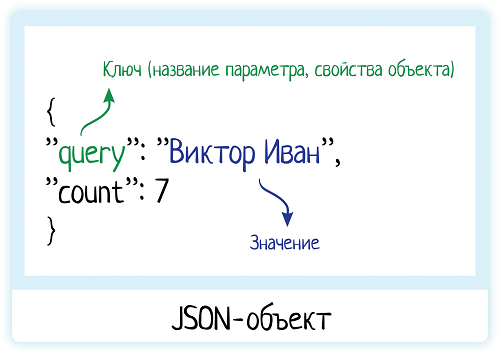

**Читать подробнее:**

- Что такое JSON - https://habr.com/ru/articles/554274/#json_elems
- Что такое API - https://habr.com/ru/articles/464261/ 

**Шаг 1. Подключение к открытым API**

- requests - библиотека в Python для работы с HTTP-запросами

Основные методы:

- GET - получить данные
  r = requests.get('https://api.example.com/data')

- POST - отправить данные
  r = requests.post('https://api.example.com/users', json={'name': 'John'})

- PUT - обновить данные
  r = requests.put('https://api.example.com/users/1', json={'name': 'Bob'})

- DELETE - удалить данные
  r = requests.delete('https://api.example.com/users/1')

- PATCH - частичное обновление
  r = requests.patch('https://api.example.com/users/1', json={'name': 'Alice'})

Полезные атрибуты ответа:
- r.status_code - код статуса ответа
- r.json() - декодировать JSON ответ
- r.text - получить текст ответа
- r.headers - заголовки ответа

In [ ]:
# Пример подключения 
import requests

data = requests.get('https://jsonplaceholder.typicode.com/users/1')
data

**Краткий перечень кодов состояния HTTP**:
- 200 - Успешный запрос (всё в порядке)
- 400 - Ошибка со стороны клиента (например, код 404 - страница не найдена, так как запрос некорректен)
- 500 - Ошибка со стороны сервера (API или платформы)

**Шаг 2. Работа с HeadHunter API**

- HeadHunter API - открытый API популярного сайта по поиску работы 
- Официальная документация: https://dev.hh.ru/
- В бесплатной версии API позволяет выгрузить информацию о компаниях-работодателях (employers) и об актуальных вакансиях (vacancies)

In [ ]:
page = 1 # номер страницы результатов
per_page = 2 # количество вакансий на странице
search_queries = '!Аналитик' # поисковой запрос 

url = 'https://api.hh.ru//vacancies'
params = {
    'page': page, 
    'per_page': per_page, 
    'text': search_queries
}

response = requests.get(url, params=params)
data_json = response.json()

**Задача. Поиск релевантных кандидатов**

- **Контекст**: Вы — аналитик данных в отделе HR в компании ООО "Hollow Knight". Руководитель дал Вам поручение проанализировать рынок вакансии. 

- **Задача**: Проанализировать вакансии на HH.RU на позицию "Аналитик данных". 

- **Требования**: 
1. Проживание / работа в Москве.
2. Полная занятость.
3. ЗП от 40 000 рублей.
4. В вакансии обязательно должен быть указан адресс!
5. Тестовое количество вакансий для выгрузки составляет 75 позиций.

- **Какие данные выгрузить**: 
1. Id вакансии
2. Название вакансии
3. Город проживания / работы + адресс 
4. Тип занятости 
5. ЗП ожидания (от ...)
6. В отдельный файл выгрузить требования к кандидатам --> requirements_vacancy.csv

- Выходные файлы сохранить в формате csv. 
- Подсказка: data['test'] = [i['name'] for i in data.area]

In [ ]:
# Создадим функцию для поиска вакансии 

def get_vacancies(search_query, page=0, per_page=100):
    url = 'https://api.hh.ru/vacancies'
    params = {
        'text': search_query,
        'page': page,
        'per_page': per_page,
        'only_with_salary': True,   # Только с указанной зарплатой,
        'additional_case': 'в Москве'  # Выбор региона
    }
    
    response = requests.get(url, params=params)
    return response.json()

In [ ]:
# Выполним поиск через API
data_analysis = get_vacancies(
    search_query='!Аналитик данных', 
    per_page=75
)

# Создадим DataFrame. Нужные данные лежат в ключе "items" json-обьекта
df_analysis = pd.DataFrame(data_analysis['items'])

In [ ]:
# В созданном DataFrame много не нужных нам колонок.
# Оставим -> id, name, area (проверить город вакансии), salary(проверить ЗП), address, snippet (проверить требования к кандидатам), schedule(проверить тип занятости)

Начнем проверять наши данные на соответствие требованиям, указанным в задании

1. В вакансии должен быть указан адресс. Проверим это

2. Теперь наша цель - определить город, в котором открыта вакансия. Это должна быть Москва. Необходимые данные хранятся в data.area

In [ ]:
# Создайте отдельный столбец с городами и отфильтруйте результат

3. Найдем вакансии с полной занятостью ("полный день"). Данные приведены в data.schedule

4. Какую ЗП готовы предложить работодатели? Нам нужен НИЖНИЙ порог для заработной платы ('from': ...). Если его нет, то мы не рассматриваем вакансию. Информация в data.salary

5. Отлично! Мы выполнили все требования по подбору вакансии. Давайте завершим анализ: удалим ненужные нам столбики, запишем требования к кандидатам в отдельный файл

- Подсказка: df.to_csv('data.csv', index=False)

In [ ]:
# Раскроем требования к кандидатам для лучшей читаемости. В итоговый файл запишем ID вакансии + требования

# Почистим колонки, которые нам не нужны. В файл запишем: ID, название вакансии, название города, график работы, ЗП

**Мы справились!**